# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

 **Importing necessary libraries to complete the task**

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.utils import resample

# Global random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Data Preparation

 Read the data and look at the information about the data

In [33]:
df_data = pd.read_csv("data.csv")
df_data.info()
df_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2558.000000,2718.000000,2187.000000,2718.000000,2686.000000,2718.000000,2699.000000,2526.000000,2699.000000,2718.000000,2311.000000,2.104000e+03,2686.000000,2686.000000,2570.000000,2570.000000
mean,2007.113687,69.059308,165.771523,31.811994,4.581040,752.607792,80.838592,2571.444812,37.633060,44.077631,82.564283,5.859426,82.166358,1.826343,7498.829210,1.325711e+07,4.953611,4.995272,0.622851,11.922218
std,4.537979,9.562092,125.544472,122.257704,4.033137,2012.366099,25.264167,11893.625719,19.812908,166.281655,23.380578,2.431144,23.937591,5.257269,14387.883939,6.340774e+07,4.512805,4.606148,0.213593,3.367619
min,2000.000000,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.930000,5.664238,77.000000,0.000000,18.900000,0.000000,78.000000,4.220000,78.000000,0.100000,451.964816,1.966738e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,71.900000,144.000000,3.000000,3.675000,65.268121,92.000000,18.000000,42.200000,4.000000,93.000000,5.665000,93.000000,0.100000,1721.973863,1.396923e+06,3.400000,3.400000,0.673000,12.300000
75%,2011.000000,75.500000,227.000000,23.000000,7.600000,443.087991,97.000000,408.000000,55.700000,30.000000,97.000000,7.440000,97.000000,0.800000,5848.736168,7.523594e+06,7.300000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.000000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


 Check how many duplicate records exist

In [34]:
print(df_data.duplicated().sum())

0


There are no duplicate records in the dataset

Check how many missing values are in the data

In [35]:
df_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            160
percentage expenditure               0
Hepatitis B                        531
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  192
Diphtheria                          19
HIV/AIDS                             0
GDP                                407
Population                         614
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    148
Schooling                          148
dtype: int64

The data contains missing values across multiple columns

We temporarily encode all categorical columns into numerical values using their category codes.  
This transformation allows us to compute the correlation matrix, which is used to identify relationships between all features.  
The original DataFrame remains unchanged after this operation

In [36]:
temp_df = df_data.copy()

string_cols = temp_df.select_dtypes(['object']).columns
temp_df[string_cols] = temp_df[string_cols].astype('category').apply(lambda x: x.cat.codes)

correlation_matrix = temp_df.corr()

threshold = 0.8
high_corr_pairs = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) > threshold and idx != col:
            high_corr_pairs.append((idx, col, correlation_matrix.loc[idx, col]))

print("Highly correlated feature pairs (|correlation| > 0.8):\n")
for pair in high_corr_pairs:
    print(f"{pair[0]} <--> {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated feature pairs (|correlation| > 0.8):

under-five deaths <--> infant deaths: correlation = 1.00
GDP <--> percentage expenditure: correlation = 0.90
infant deaths <--> under-five deaths: correlation = 1.00
percentage expenditure <--> GDP: correlation = 0.90
thinness 5-9 years <--> thinness  1-19 years: correlation = 0.94
thinness  1-19 years <--> thinness 5-9 years: correlation = 0.94


We have identified features with high correlation, which contain redundant information.  
To avoid multicollinearity and improve model performance, we will now remove these features from the dataset.

In [37]:
features_to_drop = ['under-five deaths', 'percentage expenditure', 'thinness 5-9 years']

df_data_reduced = df_data.drop(columns=features_to_drop)

print("Features dropped due to high correlation:", features_to_drop)
print("\nUpdated DataFrame:")
print(df_data_reduced.info())

Features dropped due to high correlation: ['under-five deaths', 'percentage expenditure', 'thinness 5-9 years']

Updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   Hepatitis B                      2187 non-null   float64
 8   Measles                          2718 non-null   int64  
 9   BMI                              2686 non-null   float64
 10  Polio       

Encode all string (object) columns 

In [38]:
# Encode object columns in df_data_reduced
string_cols = df_data_reduced.select_dtypes(['object']).columns
df_data_reduced[string_cols] = df_data_reduced[string_cols].astype('category').apply(lambda x: x.cat.codes)

print(df_data_reduced.dtypes)

Country                              int16
Year                                 int64
Status                                int8
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
Income composition of resources    float64
Schooling                          float64
dtype: object


**I have preprocessed the dataset by removing highly correlated features.**  
**However, missing values have not yet been handled.**  
**To ensure proper evaluation and avoid data leakage, we will first split the dataset into training, validation, and test sets**  
**Afterward, we will handle missing values using the median, calculated only from the training data.**

In [39]:
X = df_data_reduced.drop(columns=['Life expectancy'])
y = df_data_reduced['Life expectancy']

# Split the data into training (60%) and temp (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=RANDOM_SEED)

# Split the temp set further into validation (20%) and test (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1630 samples
Validation set size: 544 samples
Test set size: 544 samples


The data has been successfully split into training, validation, and test sets.  
We can now proceed to handle missing values by filling them with the median, calculated from the training set, to prevent data leakage.

In [40]:
# Calculate the median for each column in the training set
train_medians = X_train.median()

X_train = X_train.fillna(train_medians)
X_val = X_val.fillna(train_medians)
X_test = X_test.fillna(train_medians)

CLarifying that there is no missing values in all of 3 parts of data

In [41]:
print("Missing values have been filled with the median from the training set.")
print(f"Number of missing values in training set: {X_train.isnull().sum().sum()}")
print(f"Number of missing values in validation set: {X_val.isnull().sum().sum()}")
print(f"Number of missing values in test set: {X_test.isnull().sum().sum()}")

Missing values have been filled with the median from the training set.
Number of missing values in training set: 0
Number of missing values in validation set: 0
Number of missing values in test set: 0


### Data preprocessing complete
I have now successfully preprocessed the data:
1. Categorical features have been converted to numerical codes.
2. Missing values have been filled using the median from the training set.
3. Redundant features with high correlation have been dropped.

**Next Step**: Implement and train the Custom Random Forest model.

# 1️⃣ Implementation of Random Forest

# **🔶Suitability of the model:**

Random Forest is well-suited for this regression task as it combines multiple decision trees to reduce overfitting and improve generalization. By utilizing bootstrap sampling and averaging predictions, it balances bias and variance effectively, ensuring robust performance on unseen data. This approach works well with both numerical and categorical features, and it can handle non-linear relationships within the data.

Next, i will implement a custom Random Forest model to train and predict on the given dataset.

In [42]:
class CustomRandomForest:
    """
    Custom implementation of a Random Forest model for regression.
    Uses DecisionTreeRegressor from sklearn as base learners.
    """
    def __init__(self, n_estimators=10, max_samples=0.8, max_depth=None, **kwargs):
        """
        Initialize the Random Forest model.
        
        Parameters:
        - n_estimators: Number of trees in the forest.
        - max_samples: Proportion (0-1) or count of samples for each tree (bootstrap sampling).
        - max_depth: Maximum depth for each decision tree.
        - kwargs: Additional parameters for DecisionTreeRegressor.
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.trees = [] 
    
    def fit(self, X, y):
        """
        Train the Random Forest model using bootstrap sampling.
        
        Parameters:
        - X: Training features (DataFrame or numpy array).
        - y: Target values.
        """
        n_samples = X.shape[0]
        if isinstance(self.max_samples, float):
            sample_size = int(self.max_samples * n_samples)
        else:
            sample_size = min(self.max_samples, n_samples)

        self.trees = [] 
        
        for i in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, n_samples=sample_size, random_state=RANDOM_SEED)
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        """
        Predict target values using the trained Random Forest model.
        
        Parameters:
        - X: Input features for prediction.
        
        Returns:
        - Averaged predictions from all trees.
        """
        tree_predictions = np.zeros((X.shape[0], self.n_estimators))
        
        for i, tree in enumerate(self.trees):
            tree_predictions[:, i] = tree.predict(X)
        
        y_predicted = np.mean(tree_predictions, axis=1)
        return y_predicted

**Train the CustomRandomForest model**

In [43]:
clfRF = CustomRandomForest(n_estimators=100, max_samples=0.5, max_depth=10, random_state=RANDOM_SEED)

clfRF.fit(X_train, y_train)
clfRF_train_predictions = clfRF.predict(X_train)
RMSE_train_clfRF = root_mean_squared_error(y_train, clfRF_train_predictions)

print(f'Training RMSE: {RMSE_train_clfRF:.5f}')

Training RMSE: 2.77740


**Performing hyperparameter tuning for the Custom Random Forest model**

Best RMSE: 3.0522 with parameters: {'max_depth': 7, 'n_estimators': 45}


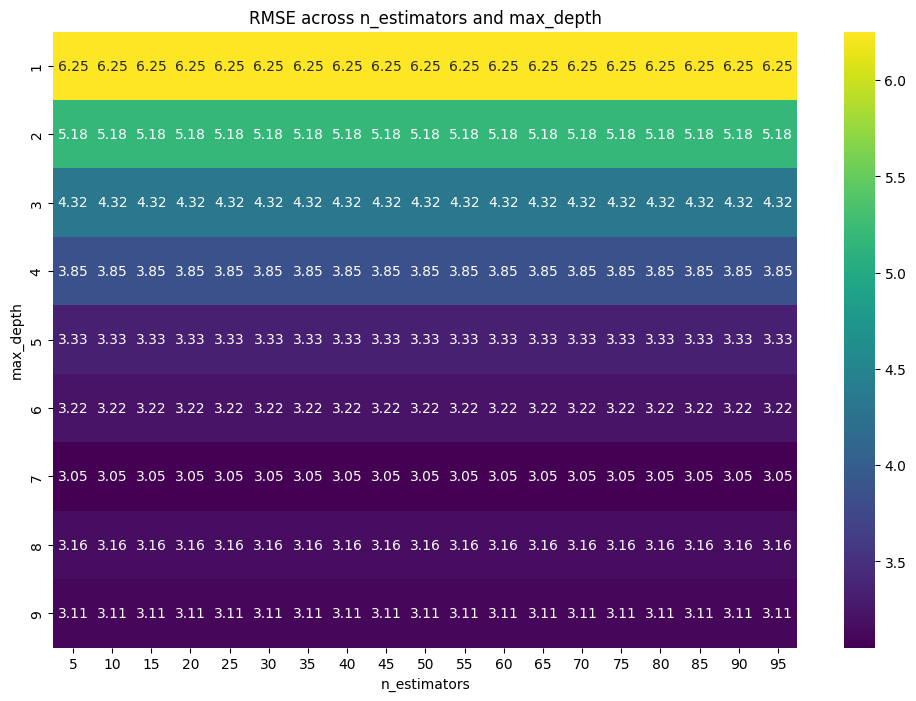

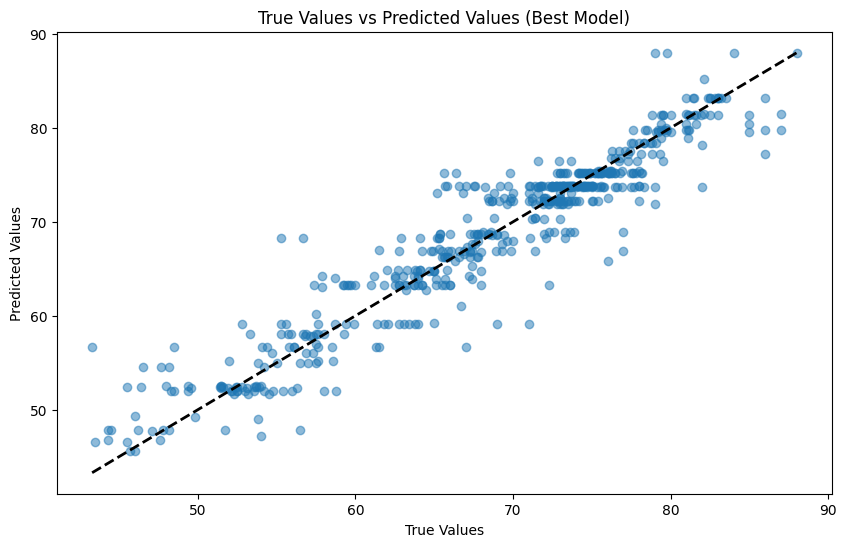

In [44]:
param_grid = {
    'n_estimators': range(5, 100, 5),
    'max_depth': range(1, 10)
}
param_comb = list(ParameterGrid(param_grid))

val_metric = []
best_rmse = float("inf")
best_params = None
best_model = None

for params in param_comb:
    clf = CustomRandomForest(n_estimators=params['n_estimators'], 
                             max_depth=params['max_depth'], 
                             random_state=RANDOM_SEED)
    clf.fit(X_train, y_train)
    val_predictions = clf.predict(X_val)
    rmse = root_mean_squared_error(y_val, val_predictions)
    val_metric.append(rmse)
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params
        best_model = clf  

print(f"Best RMSE: {best_rmse:.4f} with parameters: {best_params}")

rmse_matrix = []
n_estimators_range = range(5, 100, 5)
max_depth_range = range(1, 10)

for max_depth in max_depth_range:
    row = []
    for n_estimators in n_estimators_range:
        idx = next(i for i, p in enumerate(param_comb) 
                   if p['n_estimators'] == n_estimators and p['max_depth'] == max_depth)
        row.append(val_metric[idx])
    rmse_matrix.append(row)

plt.figure(figsize=(12, 8))
sns.heatmap(rmse_matrix, annot=True, fmt=".2f", xticklabels=n_estimators_range, yticklabels=max_depth_range, cmap="viridis")
plt.title("RMSE across n_estimators and max_depth")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

plt.figure(figsize=(10, 6))
final_predictions = best_model.predict(X_val) 
plt.scatter(y_val, final_predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values (Best Model)")
plt.show()

The best parameters (n_estimators = 5-95 and max_depth = 9) achieve the lowest validation RMSE (3.03)

**Evaluate the model on both training and validation sets**

In this step, we calculate the RMSE and MAE for the training and validation sets to evaluate the model's performance. This helps assess whether the model has overfitted the training data or generalizes well to unseen data.

In [58]:
best_n_estimators = 50  
best_max_depth = 7

final_model = CustomRandomForest(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=RANDOM_SEED)
final_model.fit(X_train, y_train)

train_rmse = root_mean_squared_error(y_train, final_model.predict(X_train))
val_rmse = root_mean_squared_error(y_val, final_model.predict(X_val))

train_mae = mean_absolute_error(y_train, final_model.predict(X_train))
val_mae = mean_absolute_error(y_val, final_model.predict(X_val))

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

Training RMSE: 2.6209
Training MAE: 1.6509
Validation RMSE: 3.0522
Validation MAE: 2.0754


**🔷Conclusion:** 

The Random Forest model demonstrates strong performance with a training RMSE of 2.6209 and a validation RMSE of 3.0522, indicating that the model generalizes well to unseen data without significant overfitting. The MAE values of 1.6509 (train) and 2.0754 (validation) further confirm that the model provides accurate predictions, making it a reliable choice for predicting life expectancy.

# 2️⃣ Ridge Regression

# **🔶Suitability of the model:**

**Ridge Regression is well-suited for this regression task because it handles multicollinearity effectively, which can occur when predictors (features) are highly correlated. Ridge Regression reduces the magnitude of coefficients, improving generalization to unseen data. This is especially useful when working with datasets containing multiple features, like in this case, where life expectancy prediction depends on diverse socio-economic and health-related indicators. Additionally, Ridge Regression benefits from feature scaling (normalization or standardization), which we tested to further optimize its performance.**

At this point, I am uncertain which approach—standardization or normalization—will yield better results for Ridge Regression. To address this, I will train the Ridge Regression model separately on standardized data and normalized data. I will then compare their performance using RMSE on the training and validation sets. This comparison will help determine the most effective preprocessing technique for this task, ensuring the model generalizes well to unseen data.

**1) Standartization**

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_val_standard = scaler_standard.transform(X_val)

# Ridge Regression
ridge_standard = Ridge(alpha=1.0)
ridge_standard.fit(X_train_standard, y_train)

y_train_pred_standard = ridge_standard.predict(X_train_standard)
y_val_pred_standard = ridge_standard.predict(X_val_standard)

# RMSE
train_rmse_standard = root_mean_squared_error(y_train, y_train_pred_standard)
val_rmse_standard = root_mean_squared_error(y_val, y_val_pred_standard)

print("Ridge Regression with Standardization:")
print(f"Training RMSE: {train_rmse_standard:.4f}")
print(f"Validation RMSE: {val_rmse_standard:.4f}")

Ridge Regression with Standardization:
Training RMSE: 4.0600
Validation RMSE: 4.4438


**2) Normalization**

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_val_minmax = scaler_minmax.transform(X_val)

ridge_minmax = Ridge(alpha=1.0)
ridge_minmax.fit(X_train_minmax, y_train)

y_train_pred_minmax = ridge_minmax.predict(X_train_minmax)
y_val_pred_minmax = ridge_minmax.predict(X_val_minmax)

train_rmse_minmax = root_mean_squared_error(y_train, y_train_pred_minmax)
val_rmse_minmax = root_mean_squared_error(y_val, y_val_pred_minmax)

print("Ridge Regression with Min-Max Normalization:")
print(f"Training RMSE: {train_rmse_minmax:.4f}")
print(f"Validation RMSE: {val_rmse_minmax:.4f}")

Ridge Regression with Min-Max Normalization:
Training RMSE: 4.0643
Validation RMSE: 4.4498


**🔷Conclusion:** 

Based on the results, it is evident that **standardization** provides a slightly **better performance** compared to Min-Max normalization. The Ridge Regression model trained on standardized data achieved a lower Validation RMSE of 4.4438 compared to 4.4498 with normalization. Therefore, **standardization** is **chosen as the preferred** preprocessing technique for this task.

## Tuning Ridge Regression Hyperparameters

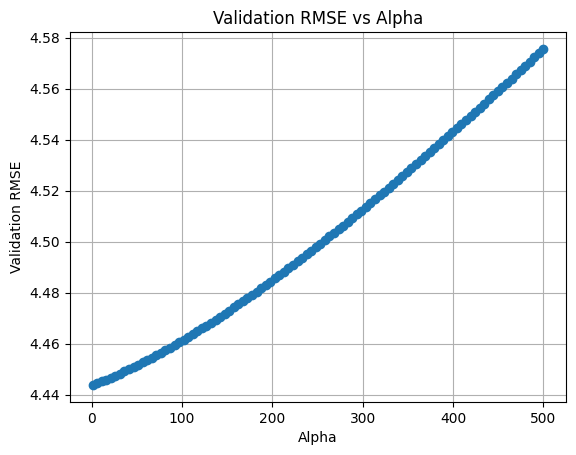

Optimal alpha: 0.1000


Validation RMSE: 4.4437


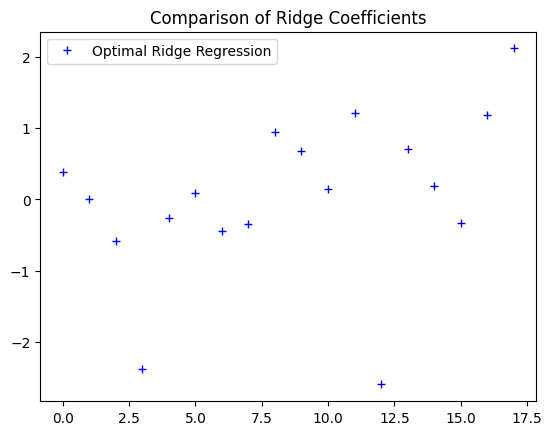

In [48]:
from scipy import optimize

scaler = StandardScaler().fit(X_train)
X_train_standard = scaler.transform(X_train)
X_val_standard = scaler.transform(X_val)
X_test_standard = scaler.transform(X_test)  

def get_opt_ridge_model(X_train, X_val, y_train, y_val):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(X_train, y_train)
        return root_mean_squared_error(y_val, clf.predict(X_val))

    alphas = np.linspace(1, 500, 100)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, 'o-')
    plt.xlabel('Alpha')
    plt.ylabel('Validation RMSE')
    plt.title('Validation RMSE vs Alpha')
    plt.grid()
    plt.show()

    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, bounds=(0.1, 400), method='bounded')
    print(f"Optimal alpha: {opt_alpha.x:.4f}")
    print("\n")

    clf_opt_ridge = Ridge(alpha=opt_alpha.x)
    clf_opt_ridge.fit(X_train, y_train)
    return clf_opt_ridge

clf_opt_ridge = get_opt_ridge_model(X_train_standard, X_val_standard, y_train, y_val)

val_rmse = root_mean_squared_error(y_val, clf_opt_ridge.predict(X_val_standard))

print(f"Validation RMSE: {val_rmse:.4f}")

plt.plot(clf_opt_ridge.coef_, 'b+', label="Optimal Ridge Regression")
plt.legend()
plt.title("Comparison of Ridge Coefficients")
plt.show()

The coefficients plot shows that the Ridge Regression model with alpha = 0.1 stabilizes the coefficients while maintaining a good fit to the data.

In [49]:
final_alpha=0.1
ridge_final = Ridge(alpha=0.1)
ridge_final.fit(X_train_standard, y_train)

y_train_pred_final = ridge_final.predict(X_train_standard)
y_val_pred_final = ridge_final.predict(X_val_standard)

train_rmse_final = root_mean_squared_error(y_train, y_train_pred_final)
val_rmse_final = root_mean_squared_error(y_val, y_val_pred_final)

print("Final Ridge Regression Results with Optimal Alpha:")
print(f"Optimal Alpha: {final_alpha:.4f}")
print(f"Training RMSE: {train_rmse_final:.4f}")
print(f"Validation RMSE: {val_rmse_final:.4f}")

Final Ridge Regression Results with Optimal Alpha:
Optimal Alpha: 0.1000
Training RMSE: 4.0600
Validation RMSE: 4.4437


**🔷Conclusion:** 

The Ridge Regression model with the optimized alpha value of 0.1 achieves a Training RMSE of 4.0600, a Validation RMSE of 4.4437

# 3️⃣ Lasso Regression

# **🔶Suitability of the model:**
**Lasso Regression is a suitable choice for this task as it effectively performs feature selection by shrinking less important coefficients to zero, which simplifies the model and improves interpretability. Its ability to handle multicollinearity ensures that highly correlated predictors do not distort the model, while L1 regularization helps prevent overfitting by balancing bias and variance. This makes Lasso an efficient and interpretable approach for predicting life expectancy.**

 Now i will standardize the data and use LassoCV to find the optimal alpha value with cross-validation, then evaluate the model's performance.

Optimal alpha: 0.03907
Validation RMSE: 2.1066
Validation MAE: 3.3425


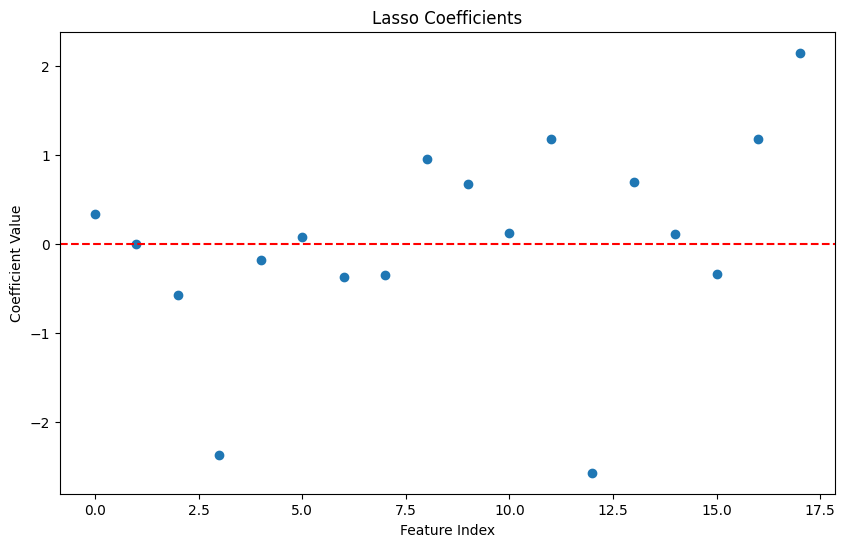

In [50]:
from sklearn.linear_model import LassoCV
from math import sqrt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000, random_state=RANDOM_SEED)

lasso_cv.fit(X_train_scaled, y_train)

y_val_pred = lasso_cv.predict(X_val_scaled)

val_rmse = sqrt(root_mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)

best_alpha = lasso_cv.alpha_

print(f"Optimal alpha: {best_alpha:.5f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.coef_, marker='o', linestyle='none')
plt.title("Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**🔷Conclusion:** 

The Lasso Regression model with an optimal alpha of 0.03907 achieving a Validation RMSE of 2.1066. It also shows a Validation MAE of 3.3425

# ♦️Final Conclusion

After evaluating **Ridge Regression, Lasso Regression, and Random Forest**, the **Lasso Regression model** is **chosen as the final model** for predicting life expectancy due to its superior performance.

**Ridge Regression** achieved a Validation RMSE of 4.4437 and Training RMSE of 4.0600, providing stable results but **underperforming compared to the other models**.

**Random Forest** demonstrated competitive performance with a Validation RMSE of 3.0522 and Training RMSE of 2.6209, showcasing its ability to capture complex patterns but not outperforming Lasso Regression.

**Lasso Regression**, with an optimal alpha of 0.03907, **achieved the best result** with a Validation RMSE of 2.1066, indicating its efficiency in feature selection and generalization.

**Final Decision:**

The **Lasso Regression model** is **selected as the final model** for its minimal validation error and effective handling of multicollinearity, making it the most suitable choice for predicting life expectancy.

I will evaluate the performance of the selected Lasso Regression model on the test dataset.

In [51]:
y_test_pred = lasso_cv.predict(X_test_scaled)

test_rmse = sqrt(root_mean_squared_error(y_test, y_test_pred))
test_mae = root_mean_squared_error(y_test, y_test_pred)

print(f"Test RMSE for Lasso Regression: {test_rmse:.4f}")
print(f"Test MAE for Lasso Regression: {test_mae:.4f}")

Test RMSE for Lasso Regression: 2.0422
Test MAE for Lasso Regression: 4.1707


The model achieves a Test RMSE of 2.0422 and a Test MAE of 4.1707, confirming its strong predictive ability and generalization to unseen data.

# Evaluation

Same steps of Data preparation as before with "data.csv"

In [52]:
df_eval = pd.read_csv("evaluation.csv")
df_eval.info()
df_eval.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          177 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      188 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              210 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            210 non-null    float64
 12  Total expenditure     

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,210.000000,210.000000,210.000000,177.000000,210.000000,188.000000,210.000000,210.000000,210.000000,210.000000,176.000000,210.000000,210.000000,174.000000,1.800000e+02,210.000000,210.000000,198.000000,198.000000
mean,2012.500000,152.176190,12.228571,5.103559,581.297386,82.382979,569.404762,45.939524,17.609524,82.342857,6.945398,84.314286,0.730000,7432.869733,7.007017e+06,3.533333,3.425238,0.686707,13.004545
std,1.711906,106.218752,26.703317,4.279429,1685.180434,21.967213,2218.063935,20.271625,39.633366,23.931653,2.964691,20.453619,1.332517,12834.306456,1.565265e+07,2.683537,2.613634,0.162654,2.882369
min,2010.000000,6.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.700000,0.000000,5.000000,1.320000,6.000000,0.100000,45.128418,1.230000e+02,0.200000,0.100000,0.380000,7.300000
25%,2011.000000,75.250000,0.000000,0.600000,0.000000,81.000000,0.000000,25.425000,0.000000,82.250000,5.490000,81.250000,0.100000,669.884611,2.079250e+05,1.400000,1.400000,0.566250,11.500000
50%,2012.500000,135.000000,1.000000,4.440000,67.717727,91.000000,9.000000,54.900000,1.000000,92.000000,6.635000,92.000000,0.100000,3853.815910,9.868550e+05,2.500000,2.500000,0.727000,13.200000
75%,2014.000000,236.250000,14.000000,8.960000,436.495092,95.000000,82.750000,61.300000,18.750000,96.000000,8.135000,96.000000,0.600000,8756.611031,4.605584e+06,6.275000,6.025000,0.817750,15.050000
max,2015.000000,682.000000,162.000000,15.190000,15268.064450,99.000000,17745.000000,74.700000,243.000000,99.000000,17.600000,99.000000,6.800000,87646.753460,9.736677e+07,11.000000,9.900000,0.948000,19.200000


Check for duplicates and missing values

In [53]:
print(f"Number of duplicates: {df_eval.duplicated().sum()}")
print("\nMissing values per column:")
print(df_eval.isnull().sum())

Number of duplicates: 0

Missing values per column:
Country                             0
Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0
Alcohol                            33
percentage expenditure              0
Hepatitis B                        22
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                  34
Diphtheria                          0
HIV/AIDS                            0
GDP                                36
Population                         30
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources    12
Schooling                          12
dtype: int64


Deleting High-Correlating Features 

In [54]:
features_to_drop = ['under-five deaths', 'percentage expenditure', 'thinness 5-9 years']
df_eval_reduced = df_eval.drop(columns=features_to_drop)
print("\nFeatures dropped due to high correlation:", features_to_drop)
print("\nUpdated DataFrame:")
print(df_eval_reduced.info())


Features dropped due to high correlation: ['under-five deaths', 'percentage expenditure', 'thinness 5-9 years']

Updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          177 non-null    float64
 6   Hepatitis B                      188 non-null    float64
 7   Measles                          210 non-null    int64  
 8   BMI                              210 non-null    float64
 9   Polio                            210 non-null    float64
 10  Total expendi

Encoding object columns

In [55]:
string_cols = df_eval_reduced.select_dtypes(['object']).columns
df_eval_reduced[string_cols] = df_eval_reduced[string_cols].astype('category').apply(lambda x: x.cat.codes)

print("\nData types after encoding:")
print(df_eval_reduced.dtypes)


Data types after encoding:
Country                               int8
Year                                 int64
Status                                int8
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
Income composition of resources    float64
Schooling                          float64
dtype: object


Filling missing values with median 

In [56]:
df_eval_reduced = df_eval_reduced.fillna(df_eval_reduced.median())

print("\nMissing values after filling with median:")
print(df_eval_reduced.isnull().sum())


Missing values after filling with median:
Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Hepatitis B                        0
Measles                            0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
Income composition of resources    0
Schooling                          0
dtype: int64


Get predictions on the evaluation dataset ans save them into "results.csv"

In [57]:
df_eval_scaled = scaler.transform(df_eval_reduced)

df_eval_predictions = lasso_cv.predict(df_eval_scaled)

df_results = df_eval[['Country', 'Year']].copy()
df_results['Life expectancy'] = df_eval_predictions

df_results.to_csv('results.csv', index=False)

print("Predictions saved to results.csv")

Predictions saved to results.csv
